In [2]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
n_data = torch.ones(100,1)
x0 = torch.normal(3*n_data,1)
y0 = torch.normal(2*n_data,1)
x1 = torch.normal(-3*n_data,1)
y1 = torch.normal(-2*n_data,1)

In [26]:
# 注意 x, y 数据的数据形式是一定要像下面一样 (torch.cat 是在合并数据)
x = torch.cat((x0,x1),0).type(torch.FloatTensor)
y = torch.cat((y0,y1),0).type(torch.LongTensor)

x,y = Variable(x),Variable(y)

print(x.size())
print(y.size())
# plt.scatter(x.data.numpy(), y.data.numpy())
# plt.show()

torch.Size([200, 1])
torch.Size([200, 1])


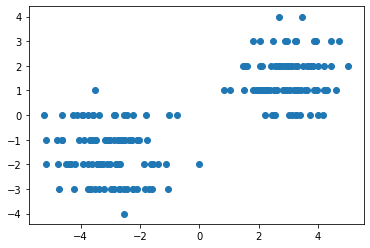

In [28]:
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [31]:
import torch
import torch.nn.functional as F     # 激励函数都在这
 
class Net(torch.nn.Module):     # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()     # 继承 __init__ 功能
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.out = torch.nn.Linear(n_hidden, n_output)       # 输出层线性输出
 
    def forward(self, x):
        # 正向传播输入值, 神经网络分析出输出值
        x = F.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.out(x)                # 输出值, 但是这个不是预测值, 预测值还需要再另外计算
        
        return x
 
net = Net(n_feature=2, n_hidden=10, n_output=2) # 几个类别就几个 output
 
print(net)  # net 的结构

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


In [ ]:
# optimizer 是训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)  # 传入 net 的所有参数, 学习率
# 算误差的时候, 注意真实值!不是! one-hot 形式的, 而是1D Tensor, (batch,)
# 但是预测值是2D tensor (batch, n_classes)
loss_func = torch.nn.CrossEntropyLoss()

for t in range(100):
    out = net(x)     # 喂给 net 训练数据 x, 输出分析值
 
    loss = loss_func(out.data[0], y)     # 计算两者的误差
 
    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上